##  <span style= "color:blue">IEE065 - Análise de Sobrevivência e Confiabilidade
#### Amazoneida Sá Peixoto Pinheiro
  Professora Associada do Depto. Estatística - UFAM
### Aula 07: Tópico III: Estimação não Paramétrica
#### Data: 01/02/2022

##  <span style= "color:red">Estimação Não Paramétrica na Presença de Censura

    * Nesta aula apresentaremos e discutiremos a Estimação Não Paramétrica da Função de       Sobrevivência e funções a ela relacionadas. Dois principais Métodos serão               abordados: O Estimador de Kaplan-Meier( um dos autores é Paul Meyer, autor do           famoso livro de Probabilidades) e o Método de Nelson-Aalen.

### 1. Razões para o uso

    * Os métodos de estimação empírica, não paramética para as funções apresentadas no         tópico II, são limitados, uma vez que a ocorrência de censura é mais regra do que       excessão.
    
    * Na abordagem não paramétrica não é feita qualquer suposição sobre a distribuição         probabilística do tempo de sobrevivência T, e portanto não são estimados                 parâmetros estatísticos.

### 2. Estimador produto de Kaplan-Meier - KM

   * Como estimar $S(t)$ quando há indivíduos censurados?
   
   * Proposto por Kaplan-Meier(1958)

    * Considere os Tempos de Sobrevivência de 21 pacientes da coorte de pacientes com AIDS do IPEC, com tempo de sobrevivência menor que 90 dias.

In [2]:
# T - tempo obs em dias
T <-c(60,84,25,54,80,37,18,29,50,83,80,81,35,52,21,40,22,85,39,16,21)

In [3]:
# s - status (0- censura, 1-dado completo)
s<-c(1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,0)

In [1]:
require(survival)

Loading required package: survival



In [4]:
Surv(T,s)

 [1] 60  84  25+ 54  80+ 37  18  29  50+ 83  80  81+ 35  52  21  40  22  85+ 39 
[20] 16  21+

    * Considere o modelo de Sobrevivência do Tópico anterior:
   
 ###  $\hat{S(t)}=\frac{No.\ de \ ind. \ que \ não \ falharam \ até \ o \ tempo  \ t}{No. \ Total \ de \ obs. \ no \ estudo}$

\
    * O estimador envolve uma sequência de passos, em que o próximo depende do anterior,
    
 
    
   * Considere o paciente censurado no 25o. dia de acompanhamento. Até a sua saída, sabe-se que estava vivo, logo para calcular $S(t)$ para t< 25. poderíamos incluí-lo tanto no denominador (ele era sobrvivente neste período), como no numerador(fazia parte do grupo de risco).
    
    * E a partir do dia 25 ? Não poderíamos garantir se era sobrevivente ou não?
    
    * O estimador de Kaplan-Meier traz uma solução para este problema. Como?
    
        * Ele utiliza os conceitos de independência de eventos e de probabilidade                 condicional para desdobrar a condição de sobreviver até o tempo t, em uma               seguência de elementos independentes, que caracterizam a sobrev. em cada                 intervalo de tempo anterior a t, cuja prob. é condicional aos que estão em               risco em cada período.
        
        * **Estimador produto**  refer-se ao fato que a ocorrência dos eventos são                 independentes e consequentemente a função de S(t) é estimada usandos-se o               produto das probabilidades de sobrv. até o tempo t.

#### Considere: 

### $t_1 < t_2 < ...... < t_m$  os $m$ diferentes valores de tempo onde ocorreram os eventos em uma amostra de $n$ indivíduos.

Tem-se que:

### $S(t_j) = P(sobreviver \ até \ t_1 \cap sobreviver \ até \ t_2 ......\cap sobreviver \ até \ t_j)$ 

### $S(t_j)=P(sobreviver \ até \ t_1)P(sobreviver \ até \ t_2|sobreviveu \ até \ t_1)xP(sobreviver até \ t_3|sobreviveu \ até \ t_2).......P(sobreviver \ até \ t_j| sobreviveu \ até \ t_{j-1})$

### $S(t_j)= P(sobreviver \ (0,t_1] \cap sobreviver \ (t_1,t_2] \cap ...sobreviver (t_{j−1},t_j])$

**$R(t_j)$ - o número de indivíduos no grupo de risco no tempo $t_j$, ou seja, os indivíduos que não falharam e não foram censurados até o intante imediatamente anterior a $t_j $**

**$\Delta N(t_j)$ - o número total de eventos ocorridos precisamente em $t_j$,**  então

$m$ - número de indivíduos que sofreram o evento, e

$n-m$ - número de indivíduos censurados

Para  m  tempos $t_j$ e m que ocorre o evento, a probabilidade de Sobrevivênvia - $\hat{S}(t)$ será estimada pelo no. de sobrv. no tempo $t_j$, ou seja :

$[ R(t_j) -\Delta N(t_j)]$ sobre 

$ R(t_j)$ - os indivíduos que estavam em risco naquele tempo

Como os eventos são independentes a $S(t)$ é estimada empiricamente pelo produto das probabilidades de sobrevivência a cada tempo $t_j \leq t$.

## $\hat{S}_{km}(t) = \frac{R(t_1)-\Delta N(t_1) }{R(t_1)}.\frac{R(t_2)-\Delta N(t_2) }{R(t_2)} . ........ .\frac{R(t_m)-\Delta N(t_m) }{R(t_m)}$

## $= \prod_{j:t_j \leq t} \frac{R(t_j)-\Delta N(t_j) }{R(t_j)}$

## $= \prod_{j:t_j \leq t}1-  \frac{\Delta N(t_j) }{R(t_j)}$ 

    * A mesma expressão pode ser apresentada de forma recursiva:
    
##  $\hat{S}_{km}(t_j) =\hat{S}_{km}(t_{j-1}) . \frac{R(t_j)-\Delta N(t_j) }{R(t_j)}$

   

### Propriedades do Estimador de KM

    * é não-viciado para amostras grandes,
     
    * é fracamente consistente
    
    * a representação gráfica é uma função escada com degraus nos tempos de falha
    
    * Se reduz a função de sobrevivência empírica, apresentada do tópico-II, se não           houver censura;
    
   * Converge assintoticamente para um processo gaussiano,  $\hat{S}(t) → N$.
   
   
   * $\hat{S}(t)$ é o estimador de m ́axima verossimilhança para $S(t)$.

### Exemplo:  

No exemplo do IPEC acima, dos 21 pacientes, 15 morreram e 6 foram censurados. Então exitem apenas 15 diferentes tempos de sobrevivência sem censura que correspondem ao tempo $t_j: j=1,2,...15$

In [11]:
sort(T)

[1] 16 18 21 21 22 25 29 35 37 39 40 50 52 54 60 80 80 81 83 84 85

In [12]:
Surv(T,s)

 [1] 60  84  25+ 54  80+ 37  18  29  50+ 83  80  81+ 35  52  21  40  22  85+ 39 
[20] 16  21+

**1o. passo:** ordenar os m valores de $t_j$

$16<18<21<22<29<35<37<39<40<52<54<60<80<83<84$

| $t_j$ | R(t_j)   | $\Delta$N(t) | $S_{km}(t)$      |
|-------|----------|---------------|------------------|
| 16    | 21       | 1             | (21-1)/21 =0.9524 |
| 18    | 20       | 1             |  0.9524*(20-1)/20=0.9048                |
| 21    | 19       | 1             |  0.9048*                |
| 22    | 17       | 1             |                  |
| 29    | 15       | 1             |                  |
| 35    | 14       | 1             |                  |
| 37    | 13       | 1             |                  |
| 39    | 12       | 1             |                  |
| 40    | 11       | 1             |                  |
| 52    | 9        | 1             |                  |
| 54    | 8        | 1             |                  |
| 60    | 7        | 1             |                  |
| 80    | 6        | 1             |                  |
| 83    | 3        | 1             |                  |
| 84    | 2        | 1             |                  |

### Estimação KM no R

No R, a tabela e a curva de sobrevivência estimada pelo Método de KM sao geradas pela  função survfit(), a sintaxe do comando é:
>survfit(formula =, data =)

O primeiro termo do argumento da função é uma fórmula que possui o seguinte formato:

> formula = Surv(tempo, status) ~1

O segundo argumento é o nome do objeto no R (base de dados), que contém as variáveis tempo e status. O comando survfit() estima o intervalo de confiança 95%

In [5]:
KM<-survfit(Surv(T,s) ~1)

In [6]:
summary(KM)

Call: survfit(formula = Surv(T, s) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   16     21       1   0.9524  0.0465       0.8655        1.000
   18     20       1   0.9048  0.0641       0.7875        1.000
   21     19       1   0.8571  0.0764       0.7198        1.000
   22     17       1   0.8067  0.0869       0.6531        0.996
   29     15       1   0.7529  0.0963       0.5859        0.968
   35     14       1   0.6992  0.1034       0.5232        0.934
   37     13       1   0.6454  0.1085       0.4642        0.897
   39     12       1   0.5916  0.1120       0.4082        0.857
   40     11       1   0.5378  0.1140       0.3550        0.815
   52      9       1   0.4781  0.1160       0.2972        0.769
   54      8       1   0.4183  0.1158       0.2431        0.720
   60      7       1   0.3585  0.1137       0.1926        0.667
   80      6       1   0.2988  0.1093       0.1459        0.612
   83      3       1   0.1992  0.1092       0.0680        0.583

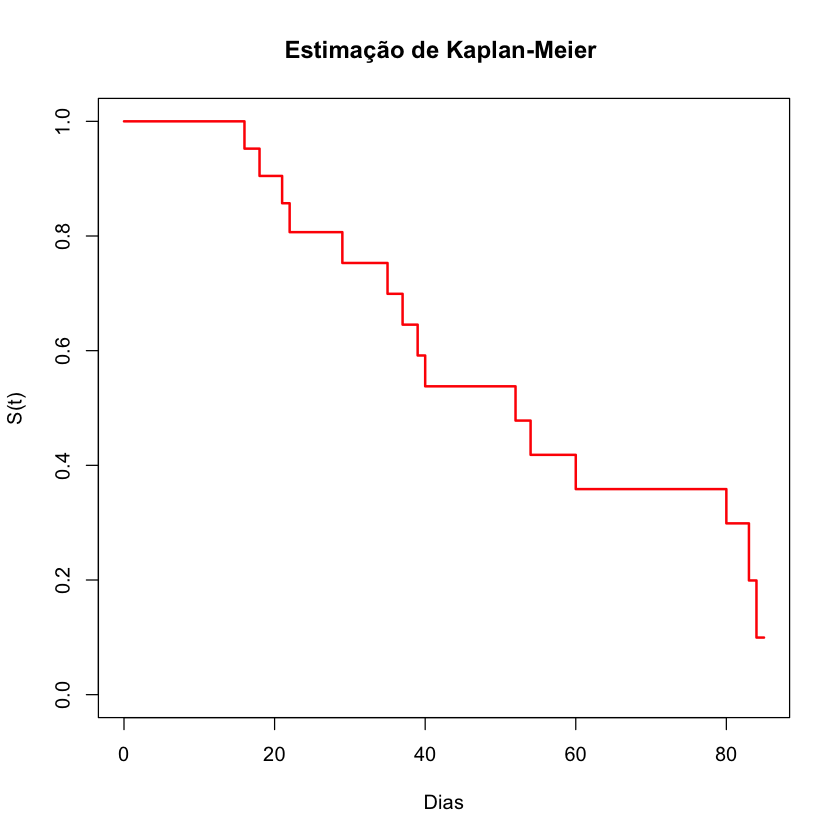

In [21]:
plot(KM,conf.int=F, col="red", lwd=2, main="Estimação de Kaplan-Meier ", xlab="Dias",ylab="S(t)")

* A partir da S(t) é possível obter outras funções básicas, usando as relações existentes entre essas funções.Por exemplo a Função Risco Acumulado H(t).


### $\hat{H}_{km}(t)= -ln(\hat{S}_{km}(t)$

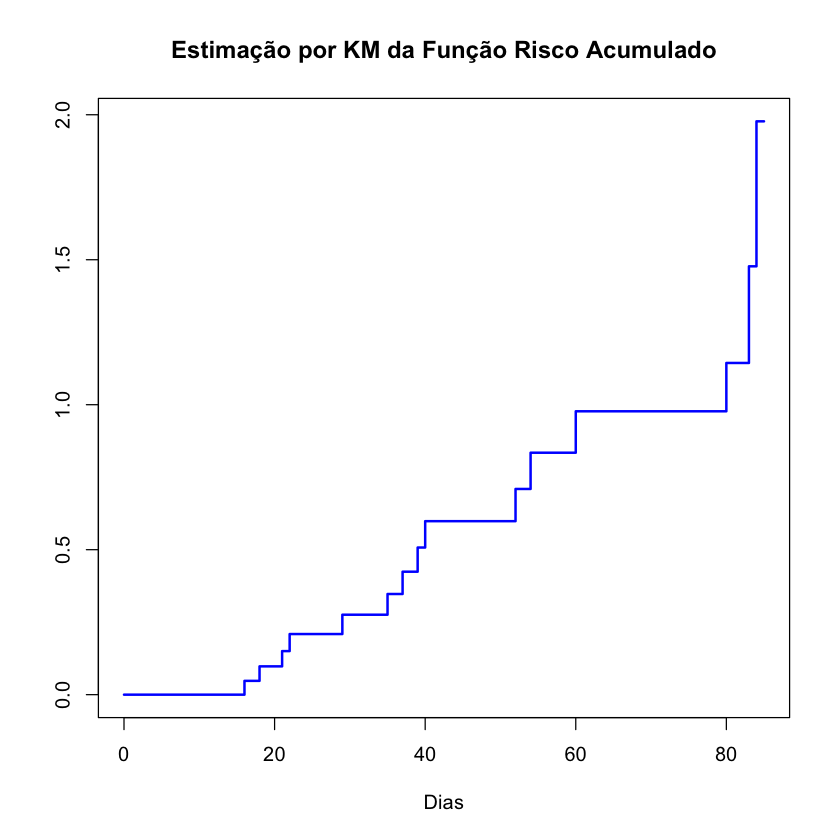

In [32]:
plot(KM, conf.int = F, fun = "cumhaz", col="blue", main="Estimação por KM da Função Risco Acumulado",lwd=2, xlab="Dias")


### 2. Estimador de Nelson-Aalen - NA

   * Uma alternativa para estimar a função Risco Acumulado - $H(t)$;
   
   * Para as amostras suficientemente grandes as estimativas para a função de                sobrevivência de NA e KM são bem próximas;
   
   * O Estimador de NA possui propriedades estatísticas que o tormam preferível;
   
   * No Exemplo acima,os dois estimadores são bem diferentes, a diferença aumente em          direção ao final do período.

  ## $\hat{H}_{na}(t)=\sum_{j:t_j\leq t}\frac{\Delta N(t_j)}{R(t_j)}$
  
  Logo, a estimação da Função de Sobrevivência:
  
  ## $\hat{S}_{na}(t)= exp[-H(t)]$

 ### Estimação NA no R

In [7]:
# utiliza a função coxph()

na<-survfit(coxph(Surv(T,s)~1))

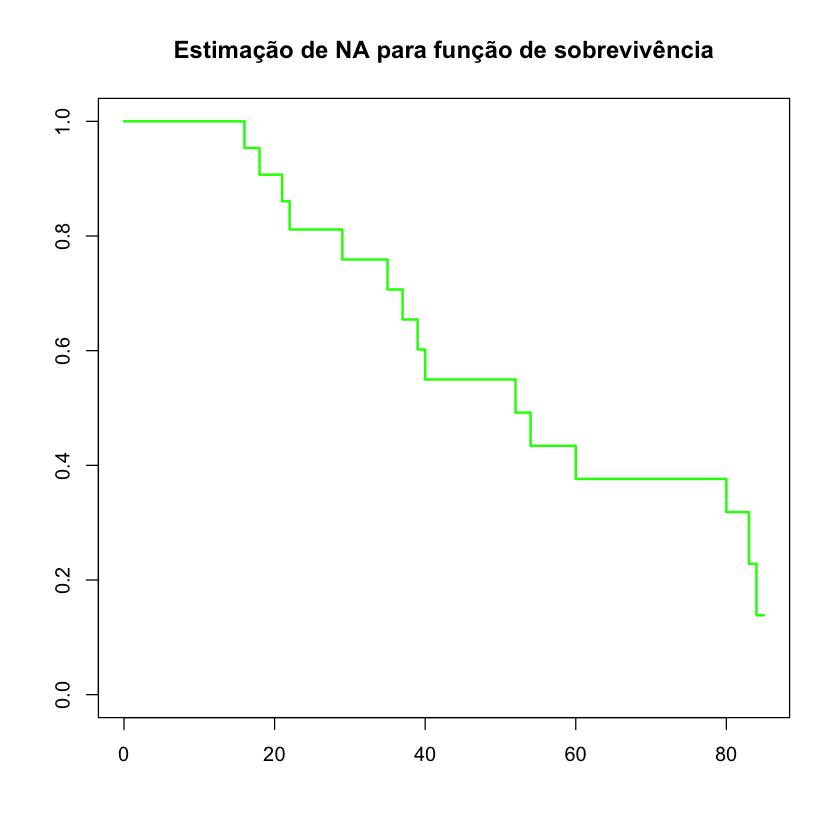

In [10]:
plot(na, col="green", conf.int=F, main="Estimação de NA para função de sobrevivência",lwd=2)

In [11]:
summary(na)

Call: survfit(formula = coxph(Surv(T, s) ~ 1))

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   16     21       1    0.953  0.0454       0.8685        1.000
   18     20       1    0.907  0.0626       0.7922        1.000
   21     19       1    0.860  0.0747       0.7258        1.000
   22     17       1    0.811  0.0851       0.6606        0.996
   29     15       1    0.759  0.0943       0.5949        0.968
   35     14       1    0.707  0.1013       0.5336        0.936
   37     13       1    0.654  0.1064       0.4757        0.900
   39     12       1    0.602  0.1100       0.4208        0.861
   40     11       1    0.550  0.1122       0.3685        0.820
   52      9       1    0.492  0.1143       0.3119        0.776
   54      8       1    0.434  0.1146       0.2588        0.728
   60      7       1    0.376  0.1129       0.2090        0.678
   80      6       1    0.319  0.1093       0.1626        0.624
   83      3       1    0.228  0.1092       0.0894      

### Tempo Mediano

$t_{md}= min\{t_j| \hat{S}(t_j) \leq 0.50\}$